In [1]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [2]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/1_7_empirical_distribution



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


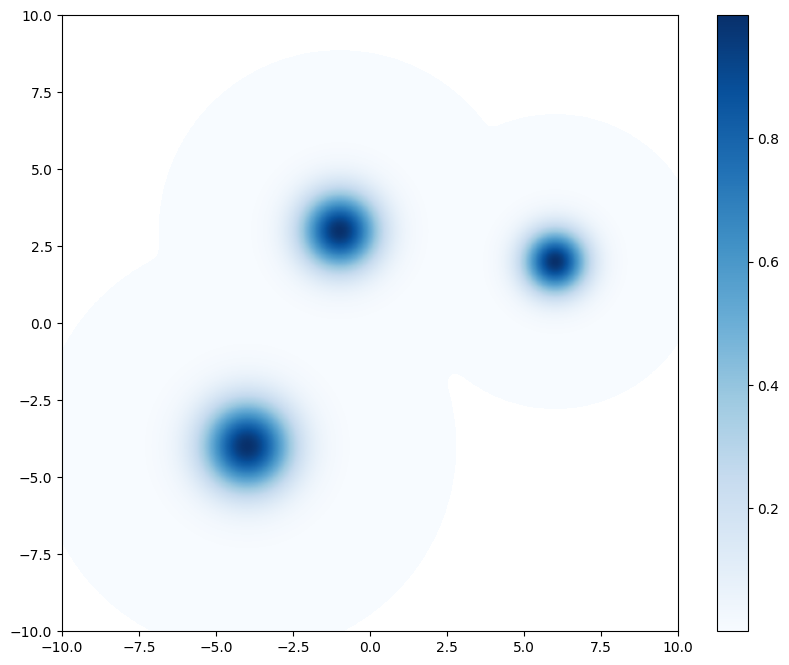

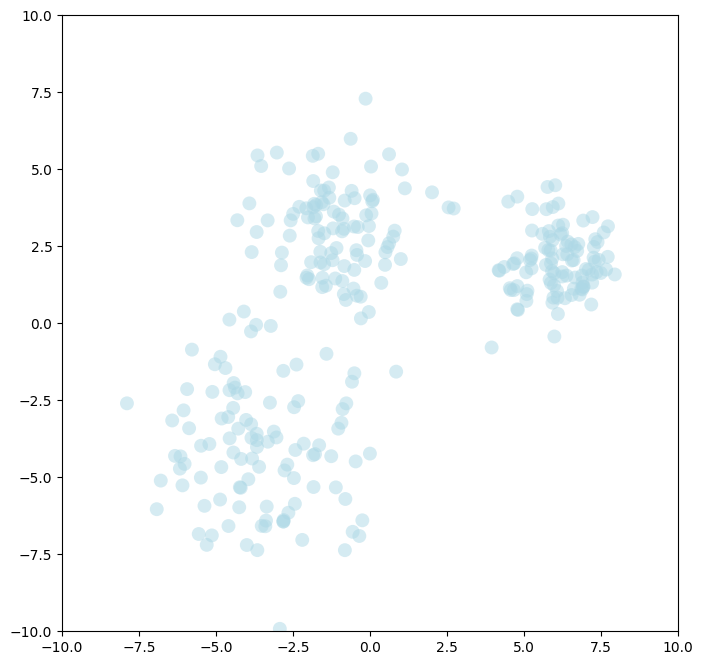

In [4]:
# 必要なライブラリのインストールとインポート
!pip install numpy matplotlib seaborn ipynbname scipy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# カラーパレットを辞書形式で定義
color_palette = {
    "White": "#FFFFFF",
    "Light Gray": "#D3D3D3",
    "Gray": "#808080",
    "Black": "#000000",
    "Green": "#008000",
    "Blue": "#0000FF",
    "Light Blue": "#ADD8E6",
    "Light Light Blue": "#E0FFFF",
    "Yellow": "#FFFF00",
    "Orange": "#FFA500",
    "Dark Orange": "#FF8C00",
    "Purple": "#800080"
}

# Light Blueを取得
light_blue_color = color_palette["Light Blue"]
white_color = color_palette["White"]

class TriModalDistribution:
    def __init__(self):
        pass

    def true_distribution(self, x, y):
        return (
            np.exp(-((x - 6)**2 + (y - 2)**2) / 1.0) +  # 右側の峰をさらに離す
            np.exp(-((x + 1)**2 + (y - 3)**2) / 1.5) +
            np.exp(-((x + 4)**2 + (y + 4)**2) / 2.0)   # 左上の峰をさらに強調
        )

    def sample(self, num_samples=300):
        samples_x = norm.rvs(loc=6, scale=1.0, size=num_samples // 3)  # (6, 2)
        samples_y = norm.rvs(loc=2, scale=1.0, size=num_samples // 3)

        samples_x = np.concatenate((samples_x, norm.rvs(loc=-1, scale=1.5, size=num_samples // 3)))  # (-1, 3)
        samples_y = np.concatenate((samples_y, norm.rvs(loc=3, scale=1.5, size=num_samples // 3)))

        samples_x = np.concatenate((samples_x, norm.rvs(loc=-4, scale=2.0, size=num_samples // 3)))  # (-4, -4)
        samples_y = np.concatenate((samples_y, norm.rvs(loc=-4, scale=2.0, size=num_samples // 3)))

        return samples_x, samples_y

# インスタンスを作成
distribution = TriModalDistribution()

# グリッドを作成
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = distribution.true_distribution(X, Y)

# カラーマップを設定（0における色を白に設定）
cmap = plt.get_cmap('Blues')
cmap.set_under(color=white_color)

# ヒートマップを描画（等高線を削除）
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=(-10, 10, -10, 10), origin='lower', cmap=cmap, vmin=1e-10)
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig(OUTPUT_DIR / 'true_distribution_heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()

# IIDサンプルの生成
samples_x, samples_y = distribution.sample(num_samples=300)  # サンプル数を減らす

# 散布図を描画
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, color=light_blue_color, alpha=0.5, s=100, edgecolors='none')  # データ点を大きくし、外枠なし
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig(OUTPUT_DIR / 'empirical_distribution_scatter.png', bbox_inches='tight', pad_inches=0)
plt.show()